The following script is made to design a Neural Network from scratch (without any libraries)

necessary imports...

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Q1.1: Compute loss and gradient w.t.r W,b

In [50]:
def softmax_regression_loss(X, Y, W, b):
    """
    Compute the loss function for soft-max regression.

    Parameters:
    - X: Input data matrix of shape (num_features, num_samples)
    - Y: True labels matrix of shape (num_classes, num_samples)
    - W: Weight matrix of shape (num_classes, num_features)
    - b: Bias vector of shape (num_classes,)

    Returns:
    - loss: Scalar value representing the loss
    - dw: Gradient of the loss with respect to w
    - db: Gradient of the loss with respect to b
    """
    num_samples = X.shape[1]

    # Compute scores
    scores = np.sum(np.dot(W, X), axis = 1) + b.T #scores.shape = (num_classes,)

    # subtract the maximum value from each row for underflow handling
    scores -= np.max(scores, axis=0, keepdims=True)
    
    # Compute probabilities using softmax function
    exp_scores = np.exp(scores)
    
    # Normalize the probabilities
    probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)

    # Compute loss:
    # take log of the probabilities:
    log_probs = np.log(probs)
    # select the correct probabilities:
    correct_probs = np.sum(np.dot(Y.T, log_probs))
    loss = -correct_probs.mean()

    # Compute gradients
    dscores = Y - probs.reshape(-1,1)
    dscores /= num_samples
    
    #each column j in dscores is the gradient w.r.t. to Wj  
    dw = np.dot(X, dscores.T)
    db = np.sum(dscores, axis=1)

    return loss, dw, db

Q1.1: test the func above with Jacobian and Gradient test

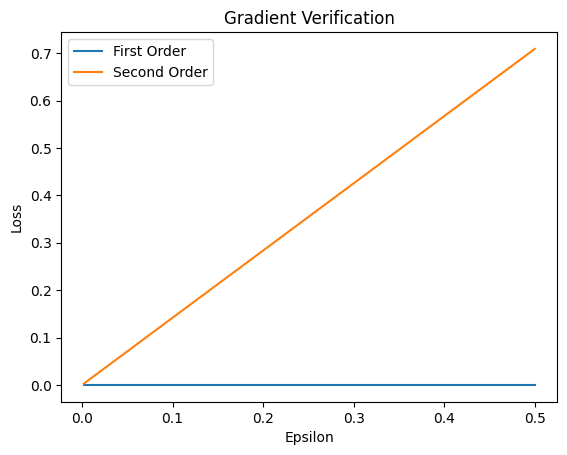

In [70]:
def grad_verification():
    # Generate random X, Y, W, b matching the dimensions in the above function signature:
    num_features = 5
    num_classes = 3
    num_samples = 10
    X = np.random.rand(num_features, num_samples)
    W = np.random.rand(num_classes, num_features)
    b = np.random.rand(num_classes,)
    #set Y to a random matrix with 1s in the correct class and 0s elsewhere:
    Y = np.zeros((num_classes, num_samples))
    for i in range(num_samples):
        Y[np.random.randint(0, num_classes), i] = 1
    # create a decending array of epsilon values:
    epsilons = np.array([(0.5)**i for i in range(1, 10)])
    # create random vector d that should hold ||d|| = O(1):
    d = np.random.rand(num_features, 1)

    losses_ord1 = []
    losses_ord2 = []
    for epsilon in epsilons:
        # increment W by epsilon:
        eps_d = np.array(epsilon*d)
        W_plus = W.copy()
        for i in range (num_features):
            W_plus[:, 0] += eps_d[i]
        loss_plus, _, _ = softmax_regression_loss(X, Y, W_plus, b)
        loss, dw, _ = softmax_regression_loss(X, Y, W, b)
        loss_ord1 = loss_plus - loss
        dw0 = dw[:, 0]
        loss_ord2 = loss_ord1 - np.dot(dw0, eps_d)
        loss_ord1_abs = np.abs(loss_ord1)
        loss_ord2_abs = np.abs(loss_ord2)
        losses_ord1.append(loss_ord1_abs)
        losses_ord2.append(loss_ord2_abs)

    #plot the results:
    plt.plot(epsilons, losses_ord1, label='First Order')
    plt.plot(epsilons, losses_ord2, label='Second Order')
    plt.xlabel('Epsilon')
    plt.ylabel('Loss')
    plt.title('Gradient Verification')
    plt.legend()
    plt.show()

grad_verification()

    

    
